# WeatherPy
HW#6
Due: December 23, 2017

In this exercise I utilized Python libraries - requests, citipy, pandas, numpy, matplotlib.pyplot, datetime - JSON traversals, and the OpenWeatherMap API to answer a fundamental question: "What's the weather like as we approach the equator?" Weather data were collected for over five hundred randomly selected cities across the world.

## Three observable trends based on the data below

1. Weather data collected today (2017/12/22) from over 548 cities around the world, indicate that temperatures are higher for cities at/near the equator (ranging from 50 to 100F), with temperatures dropping off at latitudes lower than -35 degrees and higher than +20 degrees. Cities +60 degrees north of the equator present temperatures as low as -50F. Notice that all plots are skewed with more data points in the northern hemisphere (>0 degrees latitude), because 68% of Earth's dry land is located in the northern hemisphere, whereas the remaining 32% is located in the southern hemisphere. Note also that dry land masses are primarily situated between -60 and +80 degrees latitude.

2. There appears to be no correlation between proximity to the equator and percent humidity, as the majority of cities fell within a 20 to 100% humidity range, independent of their latitude. The only exceptions were a few cities with humidity at 0% in latitudes ranging from +60 to +70 degrees. There also appears to be no correlation between proximity to the equator and cloudiness, as cloud cover varies from 0 to 100% for cities at/near the equator.

3. Wind speed appears to peak between +5 and +20 degrees north of the equator, but it is not clear to me if this is actually a real pattern, as wind speed also peaks at the the lowest (-40 degrees) and highest latitudes (+65 degrees). A larger sample size might helps us determine if there really is a positive or negative correlation between proximity to the equator and wind speed, or not. 

In [1]:
#Dependencies
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime

## Generate Cities List

In [2]:
#Create a list of 500 lat, lng combinations and run these values in a loop to get city names with citipy
lats=np.random.uniform(low=-90, high=90, size=50)
lngs=np.random.uniform(low=-180, high=180, size=50)
#print(lats)
#print(lngs)

# #Select 500 cities using citipy library
city_list =[]
for lat in lats:
    for lng in lngs:
        city = citipy.nearest_city(lat, lng)
        if (city.city_name + "," + city.country_code) not in city_list: 
            city_list.append(city.city_name + "," + city.country_code)
#print(city_list)
print(len(city_list))

#Convert list into a dataframe
city_list_df=pd.DataFrame(city_list)
city_list_df=city_list_df.rename(columns = {0: 'City_Country'})
#city_list_df.head()

629


## Perform API Calls

In [3]:
# Save config information for OpenWeatherMap 
api_key = "6561b523131c94ac6ec73a0bab8810da"
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Create blank columns for necessary fields
# city_list_df["Temperature (F)"] = ""
# city_list_df["Humidity (%)"] = ""
# city_list_df["Cloudiness (%)"] = ""
# city_list_df["Wind Speed (mph)"] = ""
# city_list_df["Lat"]= ""
# city_list_df["Lng"]= ""

#Counter
row_count =0

#Loop through and grab data of interest - temp, humidity, cloudiness, and wind speed
for index, row in city_list_df.iterrows():
    
    # Build partial query URL
    #query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (row["City_Country"])
    query_url= "http://api.openweathermap.org/data/2.5/weather?q=%s&units=%s&mode=json&APPID=%s" % (row["City_Country"], units, api_key) 
        
    #Print log to ensure loop is working correctly
    print("Processing record #" + str(row_count) + " " + row["City_Country"])
    print(query_url)
    row_count += 1

    #Run requests to grab the JSON at the requested URL
    selected_cities = requests.get(query_url).json()
    #print(selected_cities)
    #print(json.dumps(selected_cities, indent=4, sort_keys=True))
    
    #Append the parameters of interest to the appropriate columns
    #Use try/except to skip any cities which return an error message
    try: 
        temp = selected_cities["main"]["temp"]
        humid = selected_cities["main"]["humidity"]
        cloud= selected_cities ["clouds"]["all"]
        wind = selected_cities ["wind"]["speed"]
        lat = selected_cities ["coord"]["lat"]
        lng = selected_cities ["coord"]["lon"]
    
        
        city_list_df.set_value(index, "Temperature (F)", temp)
        city_list_df.set_value(index, "Humidity (%)", humid)
        city_list_df.set_value(index, "Cloudiness (%)", cloud)
        city_list_df.set_value(index, "Wind Speed (mph)", wind) 
        city_list_df.set_value(index, "Lat", lat)
        city_list_df.set_value(index, "Lng", lng)
          
    except:
        print("Error with city data. Skipping")
        continue
      
city_list_df.head()

Processing record #0 bredasdorp,za
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp,za&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #1 cape town,za
http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #2 mataura,pf
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #3 new norfolk,au
http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #4 rikitea,pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #5 busselton,au
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing 

Processing record #51 ust-kamchatsk,ru
http://api.openweathermap.org/data/2.5/weather?q=ust-kamchatsk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #52 provideniya,ru
http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #53 thompson,ca
http://api.openweathermap.org/data/2.5/weather?q=thompson,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #54 tasiilaq,gl
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #55 haradok,by
http://api.openweathermap.org/data/2.5/weather?q=haradok,by&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #56 bethel,us
http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Proce

Processing record #102 qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #103 yellowknife,ca
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #104 pevek,ru
http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #105 amderma,ru
http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #106 upernavik,gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #107 illoqqortoormiut,gl
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab88

Processing record #152 ranot,th
http://api.openweathermap.org/data/2.5/weather?q=ranot,th&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #153 yaring,th
http://api.openweathermap.org/data/2.5/weather?q=yaring,th&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #154 balabac,ph
http://api.openweathermap.org/data/2.5/weather?q=balabac,ph&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #155 caucasia,co
http://api.openweathermap.org/data/2.5/weather?q=caucasia,co&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #156 kavaratti,in
http://api.openweathermap.org/data/2.5/weather?q=kavaratti,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #157 carutapera,br
http://api.openweathermap.org/data/2.5/weather?q=carutapera,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #158 mana,gf
http://api.open

Processing record #202 kumluca,tr
http://api.openweathermap.org/data/2.5/weather?q=kumluca,tr&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #203 ukiah,us
http://api.openweathermap.org/data/2.5/weather?q=ukiah,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #204 leh,in
http://api.openweathermap.org/data/2.5/weather?q=leh,in&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #205 suluq,ly
http://api.openweathermap.org/data/2.5/weather?q=suluq,ly&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #206 warqla,dz
http://api.openweathermap.org/data/2.5/weather?q=warqla,dz&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #207 shimoda,jp
http://api.openweathermap.org/data/2.5/weather?q=shimoda,jp&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #208 yaan,cn
http://a

Processing record #252 paracuru,br
http://api.openweathermap.org/data/2.5/weather?q=paracuru,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #253 grobina,lv
http://api.openweathermap.org/data/2.5/weather?q=grobina,lv&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #254 varhaug,no
http://api.openweathermap.org/data/2.5/weather?q=varhaug,no&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #255 itatskiy,ru
http://api.openweathermap.org/data/2.5/weather?q=itatskiy,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #256 shadrinsk,ru
http://api.openweathermap.org/data/2.5/weather?q=shadrinsk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #257 zubtsov,ru
http://api.openweathermap.org/data/2.5/weather?q=zubtsov,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #258 sigayevo,ru
http://ap

Processing record #302 xique-xique,br
http://api.openweathermap.org/data/2.5/weather?q=xique-xique,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #303 gizo,sb
http://api.openweathermap.org/data/2.5/weather?q=gizo,sb&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #304 olinda,br
http://api.openweathermap.org/data/2.5/weather?q=olinda,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #305 formoso do araguaia,br
http://api.openweathermap.org/data/2.5/weather?q=formoso do araguaia,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #306 alta floresta,br
http://api.openweathermap.org/data/2.5/weather?q=alta floresta,br&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #307 ji-parana,br
http://api.openweathermap.org/data/2.5/weather?q=ji-parana,br&units=imperial&mode=json&APPID=6561b523131c94

Processing record #352 kodinsk,ru
http://api.openweathermap.org/data/2.5/weather?q=kodinsk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #353 fort nelson,ca
http://api.openweathermap.org/data/2.5/weather?q=fort nelson,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #354 juneau,us
http://api.openweathermap.org/data/2.5/weather?q=juneau,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #355 teguldet,ru
http://api.openweathermap.org/data/2.5/weather?q=teguldet,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #356 ust-ilimsk,ru
http://api.openweathermap.org/data/2.5/weather?q=ust-ilimsk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #357 kropotkin,ru
http://api.openweathermap.org/data/2.5/weather?q=kropotkin,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #358 okhotsk,ru


Processing record #404 dingle,ie
http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #405 lokot,ru
http://api.openweathermap.org/data/2.5/weather?q=lokot,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #406 biggar,ca
http://api.openweathermap.org/data/2.5/weather?q=biggar,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #407 novosergiyevka,ru
http://api.openweathermap.org/data/2.5/weather?q=novosergiyevka,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #408 sofiysk,ru
http://api.openweathermap.org/data/2.5/weather?q=sofiysk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #409 norwich,gb
http://api.openweathermap.org/data/2.5/weather?q=norwich,gb&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing reco

Processing record #454 salisbury,us
http://api.openweathermap.org/data/2.5/weather?q=salisbury,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #455 ofunato,jp
http://api.openweathermap.org/data/2.5/weather?q=ofunato,jp&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #456 cedar city,us
http://api.openweathermap.org/data/2.5/weather?q=cedar city,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #457 sayat,tm
http://api.openweathermap.org/data/2.5/weather?q=sayat,tm&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #458 rabo de peixe,pt
http://api.openweathermap.org/data/2.5/weather?q=rabo de peixe,pt&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #459 liverpool,ca
http://api.openweathermap.org/data/2.5/weather?q=liverpool,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #460 nigde,t

Processing record #505 nome,us
http://api.openweathermap.org/data/2.5/weather?q=nome,us&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #506 evensk,ru
http://api.openweathermap.org/data/2.5/weather?q=evensk,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #507 krasnoselkup,ru
http://api.openweathermap.org/data/2.5/weather?q=krasnoselkup,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #508 faya,td
http://api.openweathermap.org/data/2.5/weather?q=faya,td&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Error with city data. Skipping
Processing record #509 tessalit,ml
http://api.openweathermap.org/data/2.5/weather?q=tessalit,ml&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #510 naze,jp
http://api.openweathermap.org/data/2.5/weather?q=naze,jp&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810d

Processing record #554 kilembe,ug
http://api.openweathermap.org/data/2.5/weather?q=kilembe,ug&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #555 karla,ee
http://api.openweathermap.org/data/2.5/weather?q=karla,ee&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #556 solnechnyy,ru
http://api.openweathermap.org/data/2.5/weather?q=solnechnyy,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #557 hay river,ca
http://api.openweathermap.org/data/2.5/weather?q=hay river,ca&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #558 tabory,ru
http://api.openweathermap.org/data/2.5/weather?q=tabory,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #559 talaya,ru
http://api.openweathermap.org/data/2.5/weather?q=talaya,ru&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #560 khvoynaya,ru
http://api.ope

Processing record #605 zhoucheng,cn
http://api.openweathermap.org/data/2.5/weather?q=zhoucheng,cn&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #606 chaozhou,cn
http://api.openweathermap.org/data/2.5/weather?q=chaozhou,cn&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #607 tateyama,jp
http://api.openweathermap.org/data/2.5/weather?q=tateyama,jp&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #608 clarence town,bs
http://api.openweathermap.org/data/2.5/weather?q=clarence town,bs&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #609 aswan,eg
http://api.openweathermap.org/data/2.5/weather?q=aswan,eg&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #610 eldorado,mx
http://api.openweathermap.org/data/2.5/weather?q=eldorado,mx&units=imperial&mode=json&APPID=6561b523131c94ac6ec73a0bab8810da
Processing record #611 progreso,mx

,City_Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lng
0,"bredasdorp,za",66.35,88.0,8.0,19.71,-34.53,20.04
1,"cape town,za",66.20,63.0,40.0,11.41,-33.93,18.42
2,"mataura,pf",NaN,NaN,NaN,NaN,NaN,NaN
3,"new norfolk,au",71.60,40.0,75.0,17.22,-42.78,147.06
4,"rikitea,pf",76.38,100.0,92.0,10.09,-23.12,-134.97


548


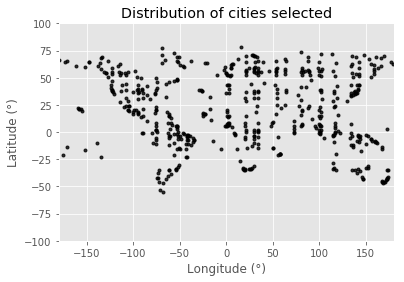

In [15]:
#Assess and clean data if necessary 
city_list_df=city_list_df.dropna(how='any')
print(len(city_list_df))
city_list_df.count()
city_list_df.to_csv("city_list_df.csv")

# Visually check distribution of lat/lngs
plt.style.use('ggplot')
plt.scatter(city_list_df["Lng"], 
            city_list_df["Lat"],color="black", linewidths=1,marker=".", alpha=0.8)     
plt.title("Distribution of cities selected")
plt.ylabel("Latitude (\xb0)")
plt.xlabel("Longitude (\xb0)")
plt.xlim([-180,180])
plt.ylim([-100,100])
plt.show()

# Scatter plots for each data type

## Temperature (F) vs. Latitude Plot

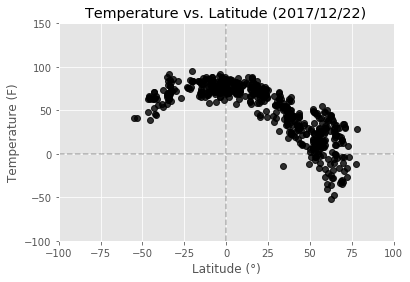

In [6]:
#Create Temperature vs. Latitude scatterplot
plt.scatter(city_list_df["Lat"], 
            city_list_df["Temperature (F)"],
            color="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -100, 150, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100,100])
plt.ylim([-100,150])
plt.savefig("Temperature_vs_Latitude.png")
plt.show()

## Humidity(%) vs. Latitude Plot

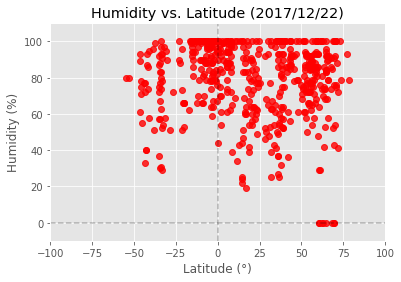

In [7]:
#Create Humidity vs. Latitude scatterplot
current_time = datetime.now().strftime('%Y-%m-%d')
plt.scatter(city_list_df["Lat"], 
            city_list_df["Humidity (%)"],
            color="red", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -10, 110, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100,100])
plt.ylim([-10, 110])
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

## Cloudiness (%) vs. Latitude Plot

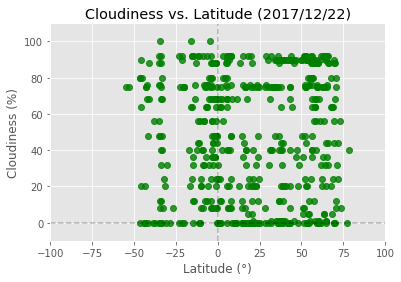

In [8]:
#Create Cloudiness vs. Latitude scatterplot
plt.scatter(city_list_df["Lat"], 
            city_list_df["Cloudiness (%)"],
            color="green", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -10, 110, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 110])
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

## Wind Speed (mph) vs. Latitude Plot

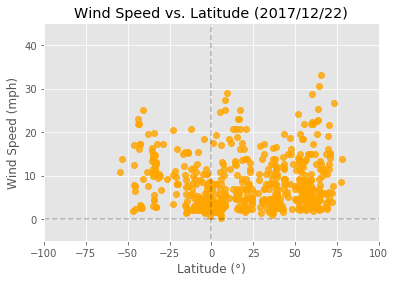

In [11]:
#Create Speed vs. Latitude scatterplot
plt.scatter(city_list_df["Lat"], 
            city_list_df["Wind Speed (mph)"],
            color="orange", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude" + " "+ "(" + datetime.now().strftime('%Y/%m/%d') + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (\xb0)")
plt.hlines(0, -100, 100, alpha=0.25, linestyle='dashed')
plt.vlines(0, -10, 45, alpha=0.25, linestyle='dashed')
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-5, 45])
plt.savefig("WindSpeed_vs_Latitude.png")
plt.show()